In [ ]:
# navigate to the directory of your project in your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!pip install --upgrade torch torchvision

## Checking Varaince Scheduler

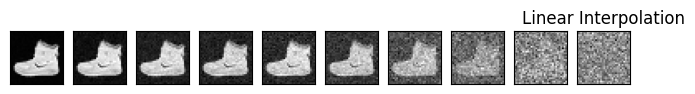

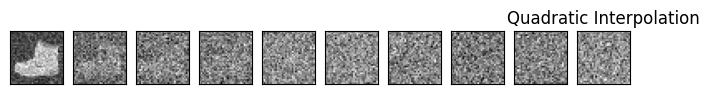

In [1]:
import torch

import matplotlib.pyplot as plt

from main import load_data
from models import VarianceScheduler
import numpy

# define the configurations of the Variance Scheduler
beta1 = 0.0001
beta2 = 0.02
num_steps = 1000
interpolation = 'linear'

# sample data
dataset = load_data()
sample_image = dataset[0][0].unsqueeze(0)

time_steps = torch.tensor([0, 10, 20, 30, 40, 50, 100, 200, 500, 999], dtype=torch.long)
sample_image = sample_image.repeat(10, 1, 1, 1)

# define the variance scheduler with linear interpolation
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Linear Interpolation')
plt.show()


# define the variance scheduler with quadratic interpolation
interpolation = 'quadratic'
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Quadratic Interpolation')
plt.show()

## Training DDPM

In [4]:
!python main.py --model ddpm --mode train





[!] WARNING, training on CPU could take long!


	 Training DDPM ...
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
x size torch.Size([128, 1, 32, 32])
shape 128
batch_size 128
^C


In [142]:
!python main.py --model ddpm --mode train


[!] WARNING, training on CPU could take long!


	 Training DDPM ...
embedding torch.Size([128, 128])
x torch.Size([128, 1, 32, 32])
x torch.Size([128, 1, 32, 32])
in block torch.Size([128, 1, 32, 32])
in block torch.Size([128, 64, 16, 16])
in block torch.Size([128, 128, 8, 8])
in block torch.Size([128, 128, 4, 4])
in block torch.Size([128, 128, 2, 2])
in block torch.Size([128, 256, 4, 4])
in block torch.Size([128, 256, 8, 8])
in block torch.Size([128, 256, 16, 16])
in block torch.Size([128, 128, 32, 32])
embedding torch.Size([128, 128])
x torch.Size([128, 1, 32, 32])
x torch.Size([128, 1, 32, 32])
in block torch.Size([128, 1, 32, 32])
in block torch.Size([128, 64, 16, 16])
in block torch.Size([128, 128, 8, 8])
in block torch.Size([128, 128, 4, 4])
in block torch.Size([128, 128, 2, 2])
in block torch.Size([128, 256, 4, 4])
in block torch.Size([128, 256, 8, 8])
in block torch.Size([128, 256, 16, 16])
in block torch.Size([128, 128, 32, 32])
embedding torch.Size([128, 128])
x torch.Size([1

## DDPM Image Generation

saves the results in your project directory as "DDPM_generated_samples.png"

In [2]:

!python main.py --model ddpm --mode generate

[!] WARNING, training on CPU could take long!
the path is  checkpoints/DDPM.pt
Traceback (most recent call last):
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/main.py", line 97, in <module>
    model.load_state_dict(torch.load(f'checkpoints/{model_type.upper()}.pt'))
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1360, in load
    return _load(
           ^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1848, in _load
    result = unpickler.load()
             ^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1812, in persistent_load
    typed_storage = load_tensor(
                    ^^^^^^^^^^^^
  

## Trainin DDIM

In [93]:
!python main.py --model ddim --mode train

Traceback (most recent call last):
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/main.py", line 17, in <module>
    from assignment import prepare_ddpm
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/assignment.py", line 7, in <module>
    from models import UNet
ImportError: cannot import name 'UNet' from 'models' (/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/models.py). Did you mean: 'MyUNet'?


## DDIM Image Generation

saves the results in your project directory as "DDIM_generated_samples.png"

In [43]:
!python main.py --model ddim --mode generate

[!] WARNING, training on CPU could take long!
the path is  checkpoints/DDIM.pt
Traceback (most recent call last):
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/main.py", line 97, in <module>
    model.load_state_dict(torch.load(f'checkpoints/{model_type.upper()}.pt'))
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1360, in load
    return _load(
           ^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1848, in _load
    result = unpickler.load()
             ^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1812, in persistent_load
    typed_storage = load_tensor(
                    ^^^^^^^^^^^^
  

## Training VAE

In [30]:
import torch
alpha = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bar = torch.cumprod(alpha, dim=0)

In [31]:
bar

tensor([      1,       2,       6,      24,     120,     720,    5040,   40320,
         362880, 3628800])

In [58]:
!python main.py --model vae --mode train


[!] WARNING, training on CPU could take long!
flattened size  2048
latent dim  1


	 Training VAE ...
out shape  torch.Size([128, 4096])
sample shape  torch.Size([128, 4096])
le shape  torch.Size([128, 2])
mid size  [512, 4, 4]
sample shape  torch.Size([128, 256, 4, 4])
out shape  torch.Size([128, 4096])
sample shape  torch.Size([128, 4096])
le shape  torch.Size([128, 2])
mid size  [512, 4, 4]
sample shape  torch.Size([128, 256, 4, 4])
out shape  torch.Size([128, 4096])
sample shape  torch.Size([128, 4096])
le shape  torch.Size([128, 2])
mid size  [512, 4, 4]
sample shape  torch.Size([128, 256, 4, 4])
out shape  torch.Size([128, 4096])
sample shape  torch.Size([128, 4096])
le shape  torch.Size([128, 2])
mid size  [512, 4, 4]
sample shape  torch.Size([128, 256, 4, 4])
out shape  torch.Size([128, 4096])
sample shape  torch.Size([128, 4096])
le shape  torch.Size([128, 2])
mid size  [512, 4, 4]
sample shape  torch.Size([128, 256, 4, 4])
out shape  torch.Size([128, 4096])
sample shape  torc

## VAE Image Generation

saves the results in your project directory as "VAE_generated_samples.png"

In [44]:
!python main.py --model vae --mode generate

[!] WARNING, training on CPU could take long!
the path is  checkpoints/VAE.pt
Traceback (most recent call last):
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/main.py", line 99, in <module>
    raise FileNotFoundError(f'[!] ERROR: Weight file for {model_type.upper()} does not exist! Try training the model first.')
FileNotFoundError: [!] ERROR: Weight file for VAE does not exist! Try training the model first.


## Training LDDPM

In [33]:
!python main.py --model lddpm --mode train

[!] WARNING, training on CPU could take long!
Traceback (most recent call last):
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/main.py", line 70, in <module>
    model = prepare_lddpm()
            ^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/assignment.py", line 129, in prepare_lddpm
    vae.load_state_dict(torch.load('checkpoints/VAE.pt'))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1360, in load
    return _load(
           ^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py", line 1848, in _load
    result = unpickler.load()
             ^^^^^^^^^^^^^^^^
  File "/Users/mikejattu/Desktop/Mike/CMPUT 328/Assignment 5/Assignment 5/a5/lib/python3.12/site-packages/torch/serialization.py"

## LDDPM Image Generation

saves the results in your project directory as "LDDM_generated_samples.png"

In [ ]:
!python main.py --model lddpm --mode generate

[np.float64(3.8198777474462986e-11), np.float64(2.3283064365386963e-10), np.float64(6.984919309616089e-09), np.float64(3.3527612686157227e-08), np.float64(8.642673492431641e-07), np.float64(2.2649765014648438e-06), np.float64(2.002716064453125e-05), np.float64(0.00021648406982421875)]
